# Salary Analysis

In [137]:
# import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%run utils.ipynb

### Load data

In [138]:
path = 'D:/Learn/projects/data/job_data/apify'
date = '01152025'
type = 'fin'
df = pd.read_csv(f'{path}/{date}_linkedin_{type}_ai_cols.csv')
print(df.shape)
df.head()

(661, 27)


,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,min_years_of_experience,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree
0,"Financial Director, Private Equity",Atlantic Group,"$200,000.00/yr - $250,000.00/yr","New York, United States",https://www.linkedin.com/jobs/view/financial-d...,Full-time,"Our Client, A top tier PE firm is looking to h...",Executive,https://www.linkedin.com/jobs/view/financial-d...,2025-01-16,...,12.0,NaN,NaN,NaN,NaN,BS,MS,not remote,"['finance', 'accounting', 'GAAP', 'financial r...",NaN
1,Sr Manager of Strategic Finance,Palo Alto Networks,NaN,"Santa Clara, CA",https://www.linkedin.com/jobs/view/sr-manager-...,Full-time,Our Mission\n\nAt Palo Alto Networks® everythi...,Mid-Senior level,https://www.linkedin.com/jobs/view/sr-manager-...,2025-01-16,...,5.0,NaN,NaN,140000.0,226500.0,BS,MBA,not remote,"['analytical', 'financial modeling', 'Excel', ...",NaN
2,Chief Financial Officer,"Piping Technology & Products, Inc.",NaN,"Houston, TX",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Overview\n\nPiping Technology & Produc...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,10.0,NaN,NaN,NaN,NaN,NaN,NaN,not remote,"['financial leadership', 'ERP systems', 'chang...",NaN
3,Chief Financial Officer,LHH,"$190,000.00/yr - $210,000.00/yr",New York City Metropolitan Area,https://www.linkedin.com/jobs/view/chief-finan...,Full-time,We are working with the CEO of a SaaS start-up...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,8.0,NaN,NaN,NaN,NaN,BS,MS,not remote,"['Accounting', 'FP&A', 'Fundraising', 'Modelli...",NaN
4,Chief Financial Officer,National Vision Inc.,NaN,"Upland, CA",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Description\n\nNational Vision is one ...,Not Applicable,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,10.0,NaN,NaN,140000.0,161000.0,BS,MS,not remote,"['financial operations', 'regulations', 'compl...",NaN


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 661 entries, 0 to 660
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   title                    661 non-null    object 
 1   companyName              655 non-null    object 
 2   salary                   262 non-null    object 
 3   location                 661 non-null    object 
 4   applyUrl                 661 non-null    object 
 5   contractType             661 non-null    object 
 6   description              661 non-null    object 
 7   experienceLevel          661 non-null    object 
 8   jobUrl                   661 non-null    object 
 9   publishedAt              661 non-null    object 
 10  sector                   655 non-null    object 
 11  workType                 661 non-null    object 
 12  posterFullName           186 non-null    object 
 13  posterProfileUrl         186 non-null    object 
 14  companyId                6

## Average Salary

In [140]:
# remove zeros
# if salary column has a value but 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 
# 'max_yearly_salary' are missing, fill missing values 
salary_cols = ['salary', 'min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary']
df = clean_salary(df, salary_cols)

In [141]:
# randomly sample some data to double check the salary columns are populated properly
samples = df.sample(n=20)
samples[salary_cols]

,salary,min_hourly_salary,max_hourly_salary,min_yearly_salary,max_yearly_salary
146,NaN,NaN,NaN,NaN,NaN
139,$40.00/hr - $40.00/hr,40.0,40.0,NaN,NaN
63,"$80,000.00/yr - $130,000.00/yr",NaN,NaN,80000.0,130000.0
196,"$100,000.00/yr - $125,000.00/yr",NaN,NaN,100000.0,125000.0
504,"$100,000.00/yr - $120,000.00/yr",NaN,NaN,100000.0,120000.0
526,NaN,NaN,NaN,NaN,NaN
272,NaN,48.0,58.0,100000.0,120000.0
427,NaN,NaN,NaN,85000.0,110000.0
351,NaN,NaN,NaN,NaN,NaN
61,NaN,43.0,57.0,90000.0,120000.0


In [142]:
# calculate AI generated salary and compare to the scraped data
print('# of company paid by hour: ', df['min_hourly_salary'].notna().sum())
print('# of company paid by year: ', df['min_yearly_salary'].notna().sum())
print('# of company no salary info: ', ((df['min_yearly_salary'].isna()) & (df['min_hourly_salary'].isna())).sum())

# of company paid by hour:  52
# of company paid by year:  326
# of company no salary info:  295


In [143]:
# calculte the average salary from salary range
df['avg_hourly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_hourly_salary', col_max='max_hourly_salary')
df['avg_yearly_salary'] = df.apply(calculate_average_salary, axis=1, col_min='min_yearly_salary', col_max='max_yearly_salary')

In [144]:
print('# of company paid by hour: ', df['avg_hourly_salary'].notna().sum())
print('# of company paid by year: ', df['avg_yearly_salary'].notna().sum())
print('# of company no salary info: ', ((df['avg_hourly_salary'].isna()) & (df['avg_yearly_salary'].isna())).sum())

# of company paid by hour:  52
# of company paid by year:  330
# of company no salary info:  291


In [145]:
df1 = df.copy()

## Data Exploration and Visualization

### Salary stats

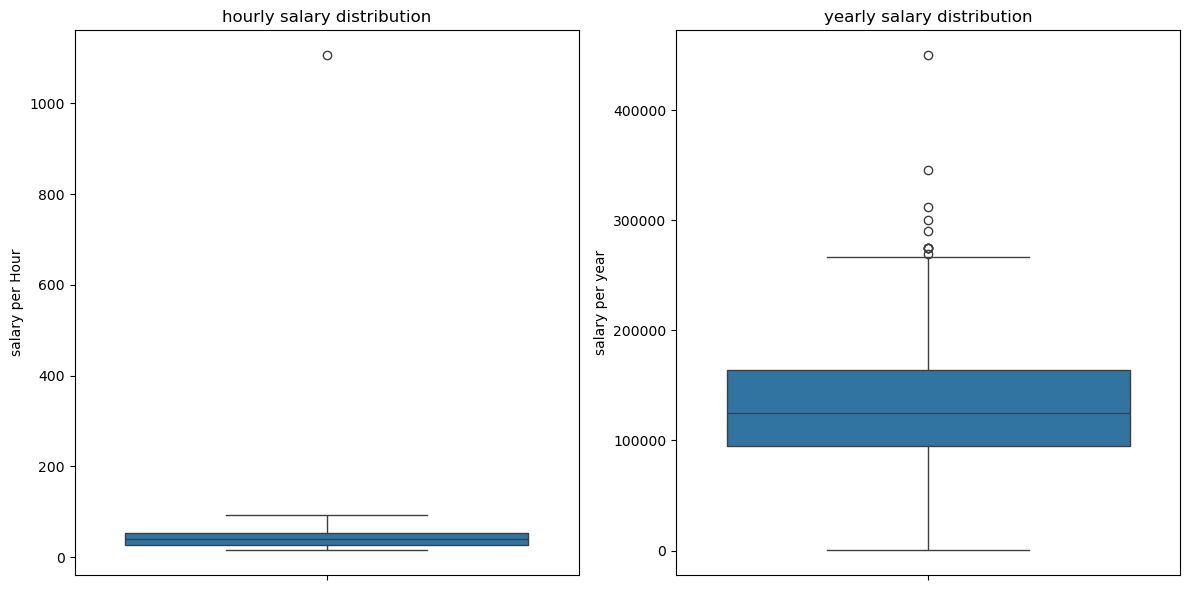

In [146]:
# salary distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, y='avg_hourly_salary', ax=axes[0])
sns.boxplot(data=df, y='avg_yearly_salary', ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='salary per Hour')
format_plot(axes[1], title='yearly salary distribution', ylabel='salary per year')
plt.savefig("salary_boxplot.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [147]:
df.columns

Index(['title', 'companyName', 'salary', 'location', 'applyUrl',
       'contractType', 'description', 'experienceLevel', 'jobUrl',
       'publishedAt', 'sector', 'workType', 'posterFullName',
       'posterProfileUrl', 'companyId', 'companyUrl', 'ai_dict',
       'min_years_of_experience', 'min_hourly_salary', 'max_hourly_salary',
       'min_yearly_salary', 'max_yearly_salary', 'required_degree',
       'prefered_degree', 'is_remote', 'required_skills', 'preferred_degree',
       'avg_hourly_salary', 'avg_yearly_salary'],
      dtype='object')

In [148]:
# df[df['avg_hourly_salary']>1000][['min_hourly_salary', 'max_hourly_salary', 'min_yearly_salary', 'max_yearly_salary', 'avg_hourly_salary', 'avg_yearly_salary']]
df[(df['avg_hourly_salary']>1000) | (df['avg_hourly_salary']<15) | (df['avg_yearly_salary']<30000)]

,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree,avg_hourly_salary,avg_yearly_salary
162,Vice President of Accounting and Family Office,Conexus Recruiting,$200.00/yr - $230.00/yr,"Irvine, CA",https://www.linkedin.com/jobs/view/vice-presid...,Full-time,Title: VP of Family Office & Corporate Account...,Director,https://www.linkedin.com/jobs/view/vice-presid...,2025-01-16,...,NaN,200.0,230.0,BS,NaN,not remote,"['leadership', 'financial operations', 'GAAP',...",NaN,NaN,215.0
328,"Analyst, Investments (Fixed Income)",EquiTrust Life Insurance Company,NaN,Greater Chicago Area,https://recruiting.ultipro.com/EQU1003TRSTL/Jo...,Full-time,"Posting Title: Associate, Investments (Fixed I...",Mid-Senior level,https://www.linkedin.com/jobs/view/analyst-inv...,2025-01-16,...,212.5,124000.0,170500.0,BS,MS,not remote,"['derivatives hedging', 'liquidity management'...",NaN,1106.25,147250.0


In [149]:
df.loc[328, ['min_hourly_salary', 'max_hourly_salary','avg_hourly_salary']] = None
df.loc[162, ['avg_yearly_salary']] = 215000

In [150]:
df[(df['avg_hourly_salary']>1000) | (df['avg_hourly_salary']<15) | (df['avg_yearly_salary']<30000)]

,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree,avg_hourly_salary,avg_yearly_salary


In [151]:
df[(df['salary'].isna()) & (df['avg_hourly_salary'].notna() | df['avg_yearly_salary'].notna())]

,title,companyName,salary,location,applyUrl,contractType,description,experienceLevel,jobUrl,publishedAt,...,max_hourly_salary,min_yearly_salary,max_yearly_salary,required_degree,prefered_degree,is_remote,required_skills,preferred_degree,avg_hourly_salary,avg_yearly_salary
1,Sr Manager of Strategic Finance,Palo Alto Networks,NaN,"Santa Clara, CA",https://www.linkedin.com/jobs/view/sr-manager-...,Full-time,Our Mission\n\nAt Palo Alto Networks® everythi...,Mid-Senior level,https://www.linkedin.com/jobs/view/sr-manager-...,2025-01-16,...,NaN,140000.0,226500.0,BS,MBA,not remote,"['analytical', 'financial modeling', 'Excel', ...",NaN,NaN,183250.0
4,Chief Financial Officer,National Vision Inc.,NaN,"Upland, CA",https://www.linkedin.com/jobs/view/chief-finan...,Full-time,Company Description\n\nNational Vision is one ...,Not Applicable,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,140000.0,161000.0,BS,MS,not remote,"['financial operations', 'regulations', 'compl...",NaN,NaN,150500.0
24,Chief Financial Officer,The Stubblebine Company,NaN,Greater Boston,https://www.linkedin.com/jobs/view/chief-finan...,Part-time,Company Description\n\nThe Stubblebine Company...,Executive,https://www.linkedin.com/jobs/view/chief-finan...,2025-01-16,...,NaN,60000.0,NaN,MBA,NaN,not remote,"['financial planning', 'financial statements',...",NaN,28.0,60000.0
25,Head of Finance,Stepful,NaN,"New York, NY",https://jobs.ashbyhq.com/stepful/d850f799-c00a...,Full-time,"180k to 200k, 0.08% to 0.1%\n\nNew York, NY | ...",Director,https://www.linkedin.com/jobs/view/head-of-fin...,2025-01-16,...,NaN,180000.0,200000.0,NaN,NaN,not remote,"['financial modeling', 'budgeting', 'forecasti...",NaN,NaN,190000.0
38,"Vice President, Finance",Focus Financial Partners,NaN,"New York, NY",https://jobs.lever.co/focuspartners/3151c907-6...,Full-time,The Vice President will be a key member of Foc...,Executive,https://www.linkedin.com/jobs/view/vice-presid...,2025-01-16,...,NaN,150000.0,225000.0,BS,NaN,not remote,"['financial analysis', 'capital markets', 'fin...",NaN,NaN,187500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619,"Sr. Financial Analyst AWSI, PROSERVE, AWS Stra...",Amazon Web Services (AWS),NaN,"Santa Monica, CA",https://www.amazon.jobs/jobs/2873386/sr-financ...,Full-time,Description\n\nJoin the Amazon Web Services (A...,Mid-Senior level,https://www.linkedin.com/jobs/view/sr-financia...,2025-01-16,...,NaN,60200.0,128800.0,BS,MBA,not remote,"['finance', 'analysis', 'data mining', 'report...",NaN,NaN,94500.0
630,Bank Teller,TEKsystems,NaN,"Chandler, AZ",https://jsv3.recruitics.com/redirect?rx_cid=34...,Full-time,Shift\n\n8:30 AM - 5:30 PM Monday - Friday 8:3...,Entry level,https://www.linkedin.com/jobs/view/bank-teller...,2025-01-16,...,19.0,NaN,NaN,NaN,NaN,not remote,['banking'],NaN,18.0,NaN
639,Associate,Accordion,NaN,"New York, United States",https://boards.greenhouse.io/accordion/jobs/64...,Full-time,Company Overview\n\nThere’s a better way to wo...,Entry level,https://www.linkedin.com/jobs/view/associate-a...,2025-01-16,...,76.0,125000.0,160000.0,BS,MS,remote,"['finance', 'data analytics', 'Excel', 'report...",NaN,68.0,142500.0
640,"Financial Advisor Wealth Manager - Orlando, FL",Florida Financial Advisors,NaN,"Orlando, FL",https://www.linkedin.com/jobs/view/financial-a...,Full-time,Florida Financial Advisors provides the abilit...,Entry level,https://www.linkedin.com/jobs/view/financial-a...,2025-01-16,...,NaN,70000.0,100000.0,AS,NaN,not remote,"['people skills', 'work ethic', 'sales']",NaN,NaN,85000.0


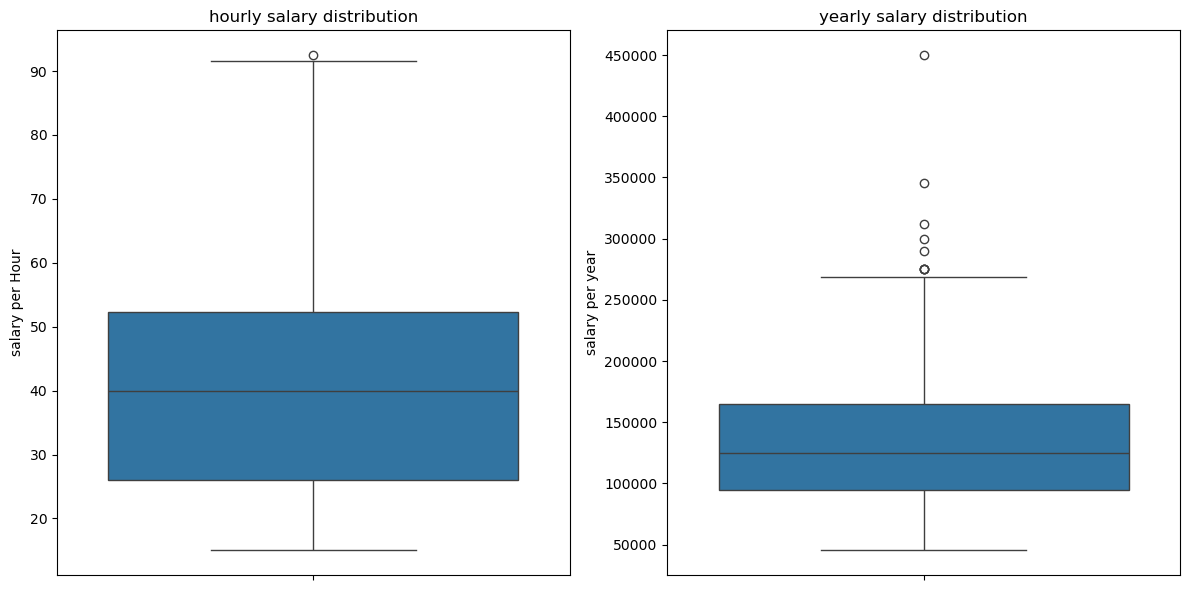

In [152]:
# salary distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxplot(data=df, y='avg_hourly_salary', ax=axes[0])
sns.boxplot(data=df, y='avg_yearly_salary', ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='salary per Hour')
format_plot(axes[1], title='yearly salary distribution', ylabel='salary per year')
plt.savefig("salary_boxplot.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

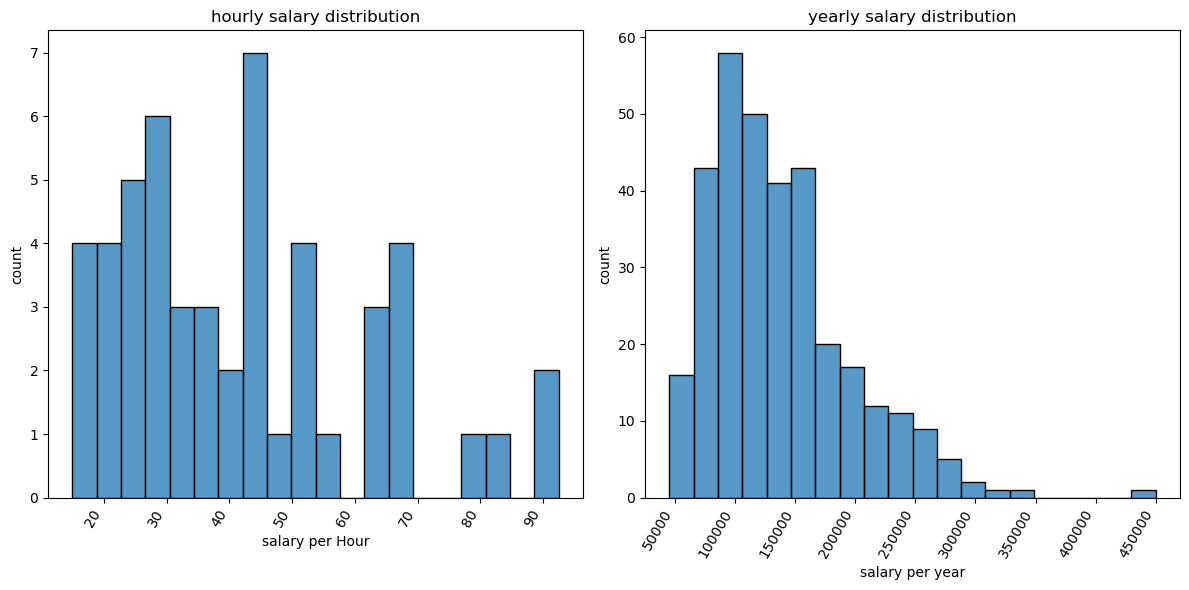

In [153]:
# salary distribution
%run utils.ipynb
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.histplot(data=df, x='avg_hourly_salary', bins=20, ax=axes[0])
sns.histplot(data=df, x='avg_yearly_salary', bins=20, ax=axes[1])
format_plot(axes[0], title='hourly salary distribution', ylabel='count', xlabel='salary per Hour')
format_plot(axes[1], title='yearly salary distribution', ylabel='count', xlabel='salary per year')
plt.savefig("salary_histgram.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()

In [154]:
df1['avg_hourly_salary'].describe()

count      52.000000
mean       62.700385
std       148.868702
min        15.000000
25%        26.500000
50%        40.500000
75%        53.375000
max      1106.250000
Name: avg_hourly_salary, dtype: float64

In [155]:
df1['avg_yearly_salary'].describe()

count       330.000000
mean     136971.663167
std       58964.349743
min         215.000000
25%       95000.000000
50%      125000.000000
75%      164375.000000
max      450000.000000
Name: avg_yearly_salary, dtype: float64

In [156]:
# pre-processing is done, start exploration by doing some visualization
df.to_csv(f'{path}/{date}_linkedin_{type}_ai_salary.csv', index=False)

### Salary distribution, statistics and trend

In [157]:
# df.groupby('simplified_job_title')['avg_yearly_salary'].describe()

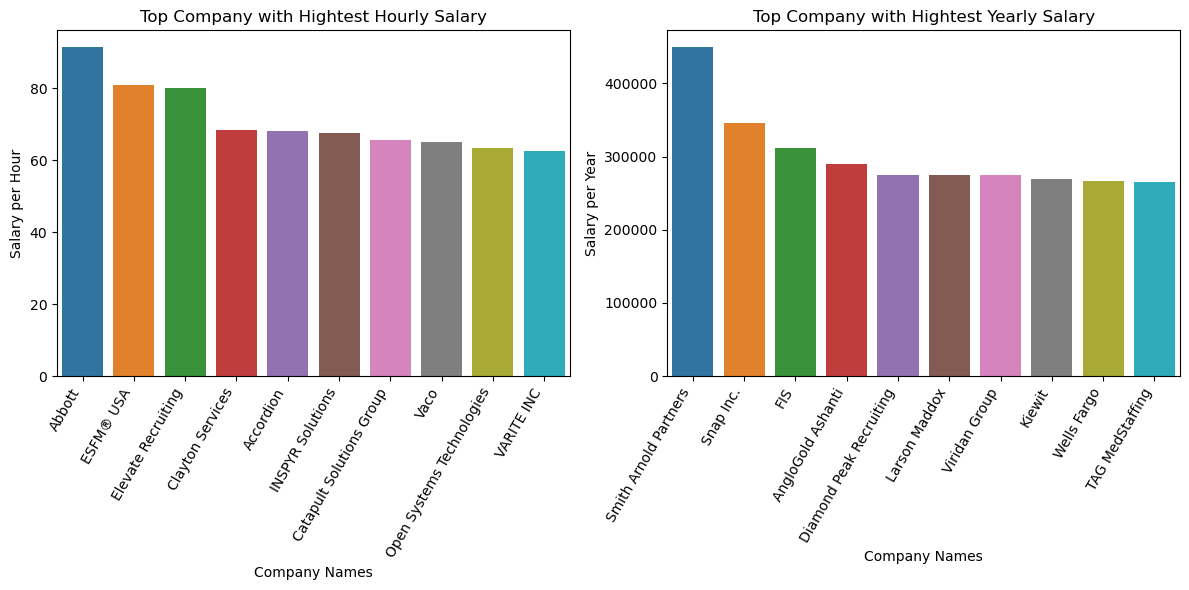

In [158]:
# company paid the most
# %run utils.ipynb
sorted_hourly_salary = df.groupby('companyName')[['avg_hourly_salary']].mean(numeric_only=True).sort_values(by='avg_hourly_salary', ascending=False)[1:11] # exclude the outlier
sorted_yearly_salary = df.groupby('companyName')[['avg_yearly_salary']].mean(numeric_only=True).sort_values(by='avg_yearly_salary', ascending=False).head(10)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(data=sorted_hourly_salary, x='companyName', y='avg_hourly_salary', ax=axes[0], hue='companyName')
sns.barplot(data=sorted_yearly_salary, x='companyName', y='avg_yearly_salary', ax=axes[1], hue='companyName')
format_plot(axes[0], 'Top Company with Hightest Hourly Salary', 'Company Names', 'Salary per Hour')
format_plot(axes[1], 'Top Company with Hightest Yearly Salary', 'Company Names', 'Salary per Year')
plt.savefig("salary_top_companies.png", dpi=300, bbox_inches="tight")
plt.tight_layout()
plt.show()